# Модуль 2. Занятие 1. Сравнение линейных моделей и градиентного спуска в машинном обучении

Набор данных California Housing включает информацию о жилищных условиях в Калифорнии, собранную на основе переписи США 1990 года. Каждый ряд представляет данные для одного района и включает различные признаки, которые могут помочь предсказать стоимость жилья. Вот описание столбцов:

- MedInc: Средний доход домохозяйства в районе (в десятках тысяч долларов).
- HouseAge: Средний возраст домов в районе.
- AveRooms: Среднее количество комнат на домохозяйство.
- AveBedrms: Среднее количество спален на домохозяйство.
- Population: Численность населения в районе.
- AveOccup: Среднее количество жильцов на дом.
- Latitude: Широта района.
- Longitude: Долгота района.
- MedHouseVal (целевая переменная): Средняя стоимость жилья в районе (в сотнях тысяч долларов).













Цель работы с этим набором данных заключается в предсказании средней стоимости жилья (MedHouseVal) на основе других признаков, чтобы выявить факторы, влияющие на цены недвижимости в Калифорнии.


Набор данных разбит на два для этого анализа: один для обучения (70% образцов) и один для тестирования (30% образцов). После разработки модели на основе данных обучения ее производительность будет проверяться на данных тестирования. Три модели будут сравниваться после их установки:
1. a linear model using all variables
2. a linear model after variable selection
3. a Gradient Boosting Machine (GBM) model

## Этап 1. Подготовка данных

Импортируем данные из библиотеки sklearn (встроенный датасет). Параметр as_frame при импорте позволяет нам взглянуть на данные в привычном нам формате датафрейма. Сразу разделим данные на признаки и таргет.

In [123]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(as_frame=True)
X = housing.data
y = housing.target



In [121]:
housing.frame

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


### Деление данных на тренировочные и тестовые наборы

Немного теории:

Деление данных на тренировочный и тестовый наборы — это один из ключевых шагов в процессе обучения моделей машинного обучения. Цель такого деления — обеспечить, чтобы модель могла быть проверена на данных, которые она не видела во время обучения, для оценки её обобщающей способности. Основные способы деления данных:

1. Простое деление (Holdout) <br>

Самый простой способ — случайное деление данных на две части: тренировочную и тестовую. Обычно берут 70–80% данных для тренировки и 20–30% для тестирования. Этот способ прост и подходит для больших датасетов, но его недостаток в том, что оценка модели может быть нестабильной, если выборка небольшая или случайное деление сильно повлияло на данные.<br>

2. Кросс-валидация (Cross-Validation)<br>

Кросс-валидация улучшает оценку, разбивая данные на k частей (фолдов), и каждый фолд по очереди используется как тестовый, а остальные k−1 — как тренировочные. Наиболее распространённый вариант — это 5-кратная (k=5) или 10-кратная (k=10) кросс-валидация. Средний результат по всем фолдам считается общей оценкой модели. Это позволяет уменьшить зависимость от случайного деления и даёт более стабильные результаты.<br>

3. Стратифицированное деление (Stratified Split)<br>

Стратифицированное деление учитывает распределение классов в данных. Это важно в задачах классификации, где может быть перекос классов. При стратифицированной кросс-валидации или стратифицированном простом делении каждый фолд или набор данных содержит пропорциональное количество экземпляров каждого класса. Это уменьшает вероятность получения смещённых оценок.<br>

4. Временное деление (Time Series Split)<br>

Для временных рядов и последовательных данных используется временное деление. В таких данных нельзя делать случайное деление, поскольку это нарушает временную структуру. В этом методе данные делятся на основе времени, например, первые 80% данных используются для тренировки, а последние 20% — для теста. Также существует кросс-валидация для временных рядов, при которой каждый раз данные делятся на основе временных последовательностей (например, rolling windows).<br>

5. Leave-One-Out Cross-Validation (LOO CV)<br>

Это особый случай кросс-валидации, когда каждый экземпляр данных по очереди используется как тестовый набор, а остальные — как тренировочный. Этот метод используется для небольших датасетов, так как он очень затратный по времени, но может дать точные оценки для маленьких наборов данных.<br>

6. Shuffle Split<br>

В Shuffle Split данные многократно перемешиваются и делятся на тренировочную и тестовую выборки, подобно кросс-валидации, но без деления на фолды. Он используется, когда требуется несколько случайных разбиений без сложной структуры кросс-валидации.

<b>В Python для разделения данных на тренировочный и тестовый наборы используются популярные методы из библиотек scikit-learn и pandas.</b>

**`train_test_split`**— основной и простой в использовании метод для случайного деления данных. Он позволяет указать долю данных, которая пойдёт в тестовый набор, и опцию стратификации для сохранения пропорций классов в данных.

Здесь test_size задает долю для тестирования (аналогично можно задать train_size), a random_state=42 фиксирует случайное разделение для воспроизводимости (т.е. разделение будет фиксированным при каждом запуске кода). Число 42 стало популярным благодаря книге Дугласа Адамса «Автостопом по галактике», где оно фигурирует как «ответ на главный вопрос жизни, Вселенной и всего такого». В итоге, random_state=42 стало полушуточным стандартом среди программистов, хотя любое другое число могло бы подойти для этой цели.

In [125]:
from sklearn.model_selection import train_test_split

# Делим данные на 80% тренировочных и 20% тестовых
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**`KFold`** реализует классический метод кросс-валидации. Он разбивает данные на k фолдов (частей), и каждый фолд поочередно используется как тестовый набор, а остальные k-1 фолдов — как тренировочный.

- n_splits: Количество фолдов. Обычно используются значения 5 или 10.
- shuffle: Опция перемешивания данных перед разбиением, что полезно для случайных выборок из упорядоченных данных.
- random_state: Обеспечивает воспроизводимость при включённом перемешивании

<b>Когда использовать:</b>
Подходит для задач с большим количеством данных, когда важно оценить модель на разных разбиениях. Обеспечивает надёжную оценку и помогает избежать переобучения на тренировочном наборе.

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


**`StratifiedKFold`** — это версия KFold, которая сохраняет пропорции классов в каждом фолде. Полезен для задач классификации с несбалансированными классами.

<b>Когда использовать:</b>
Эффективен для задач классификации с несбалансированными данными, так как обеспечивает равномерное распределение классов в каждом фолде.

In [ ]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


**`TimeSeriesSplit`** подходит для данных временных рядов, где последовательность важна. Вместо случайного разбиения каждый новый фолд использует предыдущие данные, что соответствует реальной последовательности событий во времени.

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


**`ShuffleSplit`** создаёт несколько случайных разбиений, где данные каждый раз случайно перемешиваются и делятся на тренировочную и тестовую выборки. В отличие от KFold, тут нет строго структурированных фолдов.

<b>Когда использовать:</b>
Подходит для задач, где нужно несколько случайных разбиений для более надёжной оценки модели, но где не требуется полноценная кросс-валидация.

In [ ]:
from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
for train_index, test_index in ss.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


Разделим наши данные на тренировочный и тестовый датасеты в соотношении 70 на 30. Для этого используется встроенная в sklearn функция train_test_split. 

In [ ]:
from sklearn.model_selection import train_test_split
# Split the dataset: 70% vs 30% 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


## Этап 2. Выбор и обучение модели

Первая модель, которую мы будем сравнивать - модель простой линейной регрессии. Для ее оценки воспользуемся статистической метрикой R^2 Score и прогоним модель на тестовых данных.

In [129]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [131]:
# initiate the linear model and fit with data
lm =LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

**`R² (коэффициент детерминации)`** — это метрика, которая используется для оценки качества модели регрессии. Она показывает, насколько хорошо модель объясняет вариацию целевой переменной. Значение R² варьируется от 0 до 1 (или может быть отрицательным в случае плохой модели).

<b>Интерпретация R²</b>
- R² = 1 означает, что модель идеально предсказывает целевую переменную: вся вариация в данных объясняется моделью.
- R² = 0 означает, что модель не объясняет вариацию целевой переменной лучше, чем среднее значение целевой переменной.
- R² < 0 может возникнуть, если модель предсказывает хуже, чем простая модель, предсказывающая среднее значение для всех примеров.


Чем ближе значение R² к 1, тем лучше модель справляется с предсказанием целевой переменной.

In [133]:
print("The R-squared value is: {0:0.4f} \n".format(lm.score(X_train, y_train)))

The R-squared value is: 0.6126 



**`Интерсепт`** (перехват, intercept) в модели линейной регрессии — это значение, которое модель предскажет для целевой переменной y, когда все признаки X равны нулю. Интерсепт — это константа, которая добавляется к линейной комбинации признаков, чтобы сместить линию регрессии вверх или вниз по оси y. Это позволяет модели лучше подстроиться под данные.

In [137]:
feature_names = housing.feature_names

In [139]:
param_df = pd.DataFrame({"Features": ['intercept'] + list(feature_names), 
"Coef": [lm.intercept_] + list(lm.coef_)}) 
cols = param_df.columns.tolist() 
cols = cols[-1:]+cols[:-1] 
param_df = param_df[cols] 
print(param_df)

        Coef    Features
0 -37.023278   intercept
1   0.448675      MedInc
2   0.009724    HouseAge
3  -0.123323    AveRooms
4   0.783145   AveBedrms
5  -0.000002  Population
6  -0.003526    AveOccup
7  -0.419792    Latitude
8  -0.433708   Longitude


Оценим работу модели на тестовой выборке.

In [141]:
#%% check performance on test data 
predicted = lm.predict(X_test)

In [144]:
import numpy as np
mae = np.mean(abs(predicted-y_test))
rmse = np.sqrt(np.mean((predicted-y_test)**2))
rae = np.mean(abs(predicted-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse = np.mean((predicted-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)

**`MAE`** (средняя абсолютная ошибка) рассчитывает среднее значение абсолютных ошибок между предсказанными и фактическими значениями. Она измеряет среднее отклонение предсказаний от истинных значений без учета знака ошибки.

<b>Интерпретация:</b>

- Чем меньше значение MAE, тем точнее предсказания модели.
- MAE интуитивно понятна, так как показывает среднюю величину ошибки в тех же единицах измерения, что и целевая переменная.

In [146]:
mae

0.5332001304956564

**`RMSE`** (Корень средней квадратичной ошибки) также измеряет среднее отклонение предсказанных значений от фактических, но в отличие от MAE, она более чувствительна к большим ошибкам, так как возводит каждую ошибку в квадрат перед усреднением.

<b>Интерпретация:</b>

- Чем меньше RMSE, тем точнее предсказания модели.
- Так как RMSE возводит ошибки в квадрат, она более чувствительна к выбросам, чем MAE. Большие ошибки дают непропорционально больший вклад в метрику, поэтому RMSE часто используется, когда важны не только средние ошибки, но и их распределение.

In [148]:
rmse

0.7455813830127761

**`RAE`** (относительная абсолютная ошибка) измеряет суммарную абсолютную ошибку модели по отношению к суммарной абсолютной ошибке базовой модели, которая всегда предсказывает среднее значение целевой переменной. По сути, это нормализованная версия MAE.

<b>Интерпретация:</b>

- RAE показывает, насколько модель лучше (или хуже) простой модели, предсказывающей среднее значение. Если RAE < 1, значит модель лучше, чем среднее предсказание.
- Она полезна для сравнения моделей, так как учитывает масштаб и вариативность целевой переменной.

In [151]:
rae

0.5906596232557055

**`RSE`** измеряет суммарную квадратичную ошибку модели по отношению к суммарной квадратичной ошибке базовой модели (которая предсказывает среднее значение целевой переменной). Это нормализованная версия RMSE, аналог R² в обратном смысле (чем меньше, тем лучше).

<b>Интерпретация:</b>

- Значение RSE < 1 указывает на то, что модель лучше, чем простое среднее предсказание; RSE > 1 — что хуже.
- Чем меньше значение RSE, тем лучше модель объясняет вариацию данных по сравнению с базовой моделью.

In [153]:
rse

0.42421229396754895

In [155]:
print("The R-squared value is: {0:0.4f}".format(lm.score(X_test, y_test))) 
print("Mean Absolute Error: {0:0.6f}".format(mae)) 
print("Root Mean Squared Error: {0:0.6f}".format(rmse)) 
print("Relative Absolute Error: {0:0.6f}".format(rae)) 
print("Relative Squared Error: {0:0.6f}".format(rse)) 

The R-squared value is: 0.5758
Mean Absolute Error: 0.533200
Root Mean Squared Error: 0.745581
Relative Absolute Error: 0.590660
Relative Squared Error: 0.424212


In [187]:
# print metrics on test data
print("The R-squared value is: {0:0.4f} \n".format(lm2.score(X_train_new, y_train)))
print("Mean Absolute Error: {0:0.6f}".format(mae))
print("Root Mean Squared Error: {0:0.6f}".format(rmse))
print("Relative Absolute Error: {0:0.6f}".format(rae))
print("Relative Squared Error: {0:0.6f}".format(rse))  

The R-squared value is: 0.6125 

Mean Absolute Error: 0.533206
Root Mean Squared Error: 0.745623
Relative Absolute Error: 0.590666
Relative Squared Error: 0.424259


In [207]:
print("The R-squared value is: {0:0.4f}".format(Ridge.score(X_test, y_test))) 
print("Mean Absolute Error: {0:0.6f}".format(mae)) 
print("Root Mean Squared Error: {0:0.6f}".format(rmse)) 
print("Relative Absolute Error: {0:0.6f}".format(rae)) 
print("Relative Squared Error: {0:0.6f}".format(rse)) 

The R-squared value is: 0.5758
Mean Absolute Error: 0.533202
Root Mean Squared Error: 0.745552
Relative Absolute Error: 0.590662
Relative Squared Error: 0.424179


In [213]:
predicted_Lasso = Lasso.predict(X_test)
mae = np.mean(abs(predicted_Lasso-y_test))
rmse = np.sqrt(np.mean((predicted_Lasso-y_test)**2))
rae = np.mean(abs(predicted_Lasso-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse = np.mean((predicted_Lasso-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)
print("The R-squared value is: {0:0.4f}".format(Lasso.score(X_test, y_test))) 
print("Mean Absolute Error: {0:0.6f}".format(mae)) 
print("Root Mean Squared Error: {0:0.6f}".format(rmse)) 
print("Relative Absolute Error: {0:0.6f}".format(rae)) 
print("Relative Squared Error: {0:0.6f}".format(rse)) 

The R-squared value is: 0.5318
Mean Absolute Error: 0.581607
Root Mean Squared Error: 0.783270
Relative Absolute Error: 0.644283
Relative Squared Error: 0.468183


In [217]:
predicted_ElasticNetCV = ElasticNetCV.predict(X_test)
mae = np.mean(abs(predicted_ElasticNetCV-y_test))
rmse = np.sqrt(np.mean((predicted_Lasso-y_test)**2))
rae = np.mean(abs(predicted_ElasticNetCV-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse = np.mean((predicted_ElasticNetCV-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)
print("The R-squared value is: {0:0.4f}".format(ElasticNetCV.score(X_test, y_test))) 
print("Mean Absolute Error: {0:0.6f}".format(mae)) 
print("Root Mean Squared Error: {0:0.6f}".format(rmse)) 
print("Relative Absolute Error: {0:0.6f}".format(rae)) 
print("Relative Squared Error: {0:0.6f}".format(rse)) 

The R-squared value is: 0.5719
Mean Absolute Error: 0.549604
Root Mean Squared Error: 0.783270
Relative Absolute Error: 0.608831
Relative Squared Error: 0.428129


In [225]:
predicted_SGD = SGD.predict(X_test)
mae = np.mean(abs(predicted_SGD-y_test))
rmse = np.sqrt(np.mean((predicted_SGD-y_test)**2))
rae = np.mean(abs(predicted_SGD-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse = np.mean((predicted_SGD-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)
print("The R-squared value is: {0:0.4f}".format(SGD.score(X_test, y_test))) 
print("Mean Absolute Error: {0:0.6f}".format(mae)) 
print("Root Mean Squared Error: {0:0.6f}".format(rmse)) 
print("Relative Absolute Error: {0:0.6f}".format(rae)) 
print("Relative Squared Error: {0:0.6f}".format(rse))

The R-squared value is: 0.5642
Mean Absolute Error: 0.534158
Root Mean Squared Error: 0.755729
Relative Absolute Error: 0.591721
Relative Squared Error: 0.435839


## Выбор признаков

Нормализуем данные и применим RFE (метод рекурсивного исключения признаков) и RFECV (метод рекурсивного исключения признаков с кросс-валидацией).

In [157]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

In [159]:
# initiate the linear model 
lm = LinearRegression()

In [161]:
# scale the features 
min_mascaler =  preprocessing.MinMaxScaler()
scaled_minmax = min_mascaler.fit_transform(X_train)
scaled_minmadf = pd.DataFrame(scaled_minmax, columns = feature_names)

Принцип работы рекурсивного метода исключения признаков следующий:
1. Обучает модель на всех признаках.
2. Определяет признаки с наименьшим вкладом и удаляет их.
3. Повторяет процесс до тех пор, пока не останется нужное количество признаков.

In [ ]:
from sklearn.feature_selection import RFE
estimator = SomeEstimator()  # Ваш модельный алгоритм, например, линейная регрессия
selector = RFE(estimator, n_features_to_select=5)  # Выбираем 5 признаков
selector = selector.fit(X, y)


RFECV - улучшенная версия RFE, которая использует кросс-валидацию для выбора оптимального количества признаков. Она автоматически определяет, сколько признаков нужно оставить, чтобы добиться лучшего качества модели, учитывая данные с кросс-валидацией.

In [163]:
# recursive feature elimination with cross validation, using r-squared as metric 
rfecv = RFECV(estimator=lm, step=1, cv=5) 
rfecv.fit(scaled_minmadf, y_train)

RFECV(cv=5, estimator=LinearRegression())

In [165]:
# print the optimal number of feature 
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 7


Этот график иллюстрирует, как качество модели (в данном случае по метрике mean squared error — среднеквадратичная ошибка) меняется в зависимости от количества выбранных признаков при использовании метода RFECV (Recursive Feature Elimination with Cross-Validation).

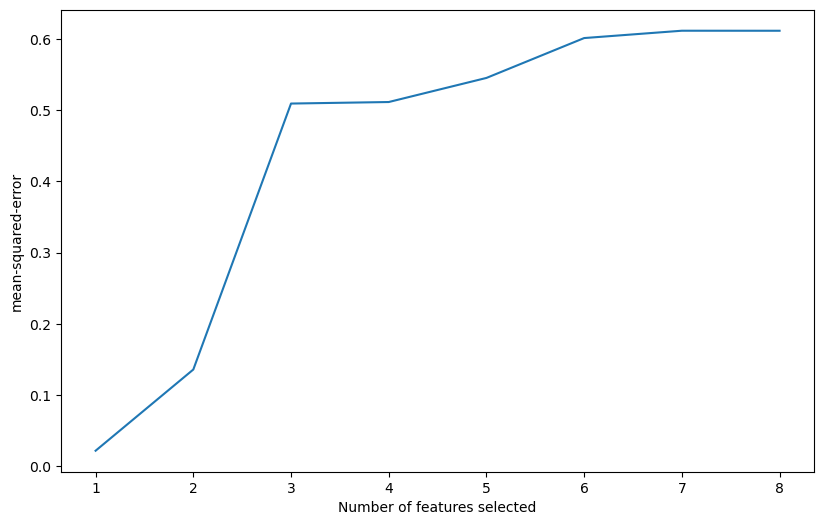

In [171]:
# plot number of features VS. cross-validation scores 
plt.figure(figsize=(6 * 1.618, 6)) 
plt.xlabel("Number of features selected") 
plt.ylabel("mean-squared-error") 
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])


### Обучим модель на выбранных признаках и нормализованных данных

In [173]:
# %% fit model с выбранными функциями  
#%% fit model with selected features X_train_new = X_train[:,rfecv.support_] 
X_train_new = X_train.values[:,rfecv.support_]
lm2 = LinearRegression() 
lm2.fit(X_train_new, y_train)

LinearRegression()

In [175]:
predicted = lm2.predict(X_train_new)
 
rmse = np.sqrt(np.mean((predicted-y_train)**2))
print("Root Mean Squared Error: {0:0.4f}" .format(rmse)) 

Root Mean Squared Error: 0.7197


In [177]:
# print the R-squared 
print("The R-squared value is: {0:0.4f} \n".format(lm2.score(X_train_new, y_train)))

The R-squared value is: 0.6125 



In [179]:
feature_cols_selected = list(np.array(feature_names)[rfecv.support_]) 
# print intercept and coefficients
param_df = pd.DataFrame({"Features": ['intercept'] + feature_cols_selected , 
"Coef": [lm2.intercept_] + list(lm2.coef_)})

cols = param_df.columns.tolist()
cols = cols[-1:]+cols[:-1] 
param_df = param_df[cols] 
print(param_df)

        Coef   Features
0 -37.011402  intercept
1   0.448723     MedInc
2   0.009785   HouseAge
3  -0.123252   AveRooms
4   0.783236  AveBedrms
5  -0.003542   AveOccup
6  -0.419487   Latitude
7  -0.433474  Longitude


<b>Оценим работу модели на тестовых данных</b>

In [183]:
# %% проверить производительность по тестовым данным 
#%% check performance on test data
X_test_part = X_test.values[:,rfecv.support_]
predicted = lm2.predict(X_test_part)

In [185]:
mae = np.mean(abs(predicted-y_test))
rmse = np.sqrt(np.mean((predicted-y_test)**2))
rae = np.mean(abs(predicted-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse = np.mean((predicted-y_test)**2)/np.mean((y_test-np.mean(y_test)))
rse = np.mean((predicted-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)

# Ridge regression and classification

**`Ridge Regression (гребневая регрессия)`** — это вид линейной регрессии, который использует L2-регуляризацию, добавляя штраф к сумме квадратов коэффициентов. Это помогает уменьшить переобучение, особенно когда признаки имеют высокую корреляцию или когда количество признаков велико по сравнению с количеством наблюдений.

<b>Когда использовать:</b>
- Когда есть многоколлинеарность между признаками (высокая корреляция между независимыми переменными).
- Когда модель склонна к переобучению из-за большого числа признаков.

- alpha=0.5: Параметр регуляризации, который определяет силу L2-регуляризации.

In [189]:
 from sklearn import linear_model
Ridge = linear_model.Ridge(alpha=0.5)

In [191]:
Ridge.fit(X_train, y_train)

Ridge(alpha=0.5)

In [193]:
print("The R-squared value is: {0:0.4f} \n".format(Ridge.score(X_train, y_train)))

The R-squared value is: 0.6126 



In [195]:
param_df = pd.DataFrame({"Features": ['intercept'] + list(feature_names), 
"Coef": [Ridge.intercept_] + list(Ridge.coef_)}) 
cols = param_df.columns.tolist() 
cols = cols[-1:]+cols[:-1] 
param_df = param_df[cols] 
print(param_df)

        Coef    Features
0 -37.021351   intercept
1   0.448593      MedInc
2   0.009725    HouseAge
3  -0.123169    AveRooms
4   0.782280   AveBedrms
5  -0.000002  Population
6  -0.003526    AveOccup
7  -0.419790    Latitude
8  -0.433694   Longitude


In [197]:
predicted_Ridge = Ridge.predict(X_test)

In [205]:
mae = np.mean(abs(predicted_Ridge-y_test))
rmse = np.sqrt(np.mean((predicted_Ridge-y_test)**2))
rae = np.mean(abs(predicted_Ridge-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse = np.mean((predicted_Ridge-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)

## Lasso

**`Lasso-регуляризация (Least Absolute Shrinkage and Selection Operator)`** — это метод регуляризации, используемый в линейных моделях, который добавляет L1-регуляризацию. В отличие от Ridge-регуляризации, которая использует L2-регуляризацию, Lasso-регуляризация добавляет штраф к сумме абсолютных значений коэффициентов признаков, а не к их квадратам.

<b>Особенности Lasso-регуляризации</b><br>
Lasso-регуляризация помогает модели в решении двух основных задач:

1. Уменьшение переобучения — как и другие методы регуляризации, она ограничивает величину коэффициентов, что делает модель более устойчивой.
2. Отбор признаков — в отличие от Ridge-регуляризации, Lasso может занулять некоторые коэффициенты, полностью исключая соответствующие признаки из модели. Это делает Lasso полезной для отбора признаков, так как модель автоматически оставляет только наиболее значимые признаки, зануляя остальные.

<b>Когда использовать Lasso-регуляризацию?</b>
- Когда необходимо не только уменьшить переобучение, но и выполнить отбор признаков.
- Когда у модели слишком много признаков, и нужно отобрать только те, которые действительно важны для предсказаний.
- Когда есть подозрение, что некоторые признаки незначимы или сильно коррелируют с другими признаками.

- alpha=0.1: Параметр регуляризации, который контролирует степень воздействия L1-регуляризации на модель.

In [209]:
Lasso = linear_model.Lasso(alpha=0.1)
Lasso.fit(X_train, y_train)
print("The R-squared value is: {0:0.4f} \n".format(Lasso.score(X_train, y_train)))
param_df = pd.DataFrame({"Features": ['intercept'] + list(feature_names), 
"Coef": [Lasso.intercept_] + list(Lasso.coef_)}) 
cols = param_df.columns.tolist() 
cols = cols[-1:]+cols[:-1] 
param_df = param_df[cols] 
print(param_df)

The R-squared value is: 0.5489 

       Coef    Features
0 -7.698845   intercept
1  0.392693      MedInc
2  0.015081    HouseAge
3 -0.000000    AveRooms
4  0.000000   AveBedrms
5  0.000016  Population
6 -0.003149    AveOccup
7 -0.114291    Latitude
8 -0.099308   Longitude


## ElasticNetCV

**`ElasticNetCV`**— это модель регуляризации, которая объединяет свойства Lasso и Ridge регрессии, используя L1 и L2 регуляризации одновременно. В отличие от обычной ElasticNet, ElasticNetCV выполняет кросс-валидацию для подбора оптимальных значений гиперпараметров регуляризации.

### Преимущества и недостатки ElasticNetCV
Преимущества:

- Автоматический отбор признаков: Зануляет коэффициенты для некоторых признаков, если они менее значимы, как в Lasso.
- Гибкость регуляризации: ElasticNet позволяет комбинировать L1 и L2 регуляризацию, адаптируясь к особенностям данных.
- Кросс-валидация: ElasticNetCV автоматически подбирает лучшие значения параметров для конкретных данных. 

Недостатки:

- Чувствительность к гиперпараметрам: Несмотря на то, что ElasticNetCV находит оптимальные значения alpha и l1_ratio, на большом количестве данных и признаков настройка может быть вычислительно затратной.
- Подходит только для линейных моделей: Как и Lasso и Ridge, ElasticNet применим только к задачам с линейными зависимостями.

- cv=10: Указывает количество фолдов для кросс-валидации. В данном случае используется 10-кратная кросс-валидация. Это значит, что данные будут разбиты на 10 частей (фолдов), и на каждом фолде модель будет обучаться на 9 частях данных и проверяться на оставшейся части. Среднее значение ошибки по всем 10 фолдам используется для выбора оптимальных значений alpha и l1_ratio.

- random_state=0: Устанавливает начальное состояние для генератора случайных чисел, чтобы результат кросс-валидации был воспроизводимым. Это полезно для консистентности результатов при каждом запуске кода, так как случайное разбиение данных будет одинаковым при каждом повторении.

In [215]:
from sklearn.linear_model import ElasticNetCV
ElasticNetCV = ElasticNetCV(cv=10, random_state=0)
ElasticNetCV.fit(X_train, y_train)
print("The R-squared value is: {0:0.4f} \n".format(ElasticNetCV.score(X_train, y_train)))
param_df = pd.DataFrame({"Features": ['intercept'] + list(feature_names), 
"Coef": [ElasticNetCV.intercept_] + list(ElasticNetCV.coef_)}) 
cols = param_df.columns.tolist() 
cols = cols[-1:]+cols[:-1] 
param_df = param_df[cols] 
print(param_df)

The R-squared value is: 0.5886 

        Coef    Features
0 -24.350691   intercept
1   0.385658      MedInc
2   0.012050    HouseAge
3   0.000000    AveRooms
4   0.000000   AveBedrms
5   0.000004  Population
6  -0.003296    AveOccup
7  -0.296449    Latitude
8  -0.293957   Longitude


# SGD (стохастический градиентный спуск)

**`Стохастический градиентный спуск (Stochastic Gradient Descent, SGD)`** — это популярный метод оптимизации, используемый для обучения моделей машинного обучения, особенно в задачах линейной регрессии, логистической регрессии и нейронных сетей. Этот метод является разновидностью градиентного спуска, которая ускоряет процесс обучения, делая обновление параметров модели на основе случайного подмножества данных (батча), а не на всём тренировочном наборе данных.

### Преимущества и недостатки SGD
Преимущества:
- Скорость и эффективность: Поскольку SGD обновляет параметры на основе одного (или небольшого количества) примера, он требует меньше вычислений и быстрее работает на больших наборах данных.
- Шум и рандомизация: Шум в оценках градиента может помочь выбрать более удачный путь к оптимуму, позволяя алгоритму избежать локальных минимумов.
- Гибкость и масштабируемость: Подходит для огромных наборов данных, так как требует меньшего объёма памяти.


Недостатки:
- Сходится медленнее и менее стабильно: Из-за использования только одного образца данных на итерацию обновления параметров могут "скакать", из-за чего алгоритм сходится медленно и менее стабильно.
- Чувствительность к скорости обучения: Выбор подходящего значения для скорости обучения η критичен. Слишком высокое значение приведёт к нестабильности, а слишком низкое замедлит сходимость.
- Не всегда достигает глобального минимума: Стохастичность в процессе обновления градиента может не позволить алгоритму достичь истинного минимума функции потерь.

### Варианты стохастического градиентного спуска
Существуют улучшенные методы, которые уменьшают недостатки базового SGD:

- Mini-Batch Gradient Descent: Обновляет параметры на основе небольших батчей (подмножества данных) вместо одного примера. Это уменьшает шум и делает процесс более стабильным.
- Momentum (моментум): Добавляет инерцию, помогая сглаживать и ускорять процесс оптимизации.
- AdaGrad, RMSProp и Adam: Это адаптивные методы, которые динамически изменяют скорость обучения для каждого параметра, ускоряя сходимость и улучшая стабильность.

In [219]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

- max_iter=1000: Максимальное количество итераций.
- tol=1e-3: Критерий для остановки, если изменения в потере становятся меньше 0.001.

In [221]:
SGD = make_pipeline(StandardScaler(),
...                     SGDRegressor(max_iter=1000, tol=1e-3))
SGD.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [223]:
print("The R-squared value is: {0:0.4f} \n".format(SGD.score(X_train, y_train)))

The R-squared value is: 0.6082 

